# Project 1: Analysis of Various Metrics and How They Relate to Stress and Work-Life Balance

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Exploration

In [2]:
# Read csv file
wellbeing_df = pd.read_csv('data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [11]:
# Change the datatype of the stress column to an integer

# First find the row(s) that is NOT a number on the stress scale
stress_scores = wellbeing_df['DAILY_STRESS'].unique()

# Convert the stress scores into a list
stress_scores_list = list(stress_scores)
print(stress_scores_list)

# From the list, drop the values that are not valid stress scores
invalid_response = '1/1/00'

# Create a variable to filter for the invalid response
drop_response = (wellbeing_df['DAILY_STRESS'] == invalid_response)

# Drop the row containing the invalid response
wellbeing_df = wellbeing_df.loc[~drop_response]
wellbeing_df

# Convert the daily stress column to an integer and check it was converted correctly
wellbeing_df['DAILY_STRESS'] = wellbeing_df['DAILY_STRESS'].astype(int)
wellbeing_df.info()

# Rename the age values for clarity purposes
wellbeing_df = wellbeing_df.replace("Less than 20", "20 or Younger")
wellbeing_df = wellbeing_df.replace("51 or more", "51 or Older")

# Create bins to categorize work life balance scores 
bins =[0, 550, 680, 900]
group_names = ['Poor', 'Good', 'Excellent']
wellbeing_df['Work Life Summary'] = pd.cut(wellbeing_df['WORK_LIFE_BALANCE_SCORE'], bins, labels=group_names, include_lowest=True)

[2, 3, 1, 4, 5, 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Timestamp                15971 non-null  object  
 1   FRUITS_VEGGIES           15971 non-null  int64   
 2   DAILY_STRESS             15971 non-null  int32   
 3   PLACES_VISITED           15971 non-null  int64   
 4   CORE_CIRCLE              15971 non-null  int64   
 5   SUPPORTING_OTHERS        15971 non-null  int64   
 6   SOCIAL_NETWORK           15971 non-null  int64   
 7   ACHIEVEMENT              15971 non-null  int64   
 8   DONATION                 15971 non-null  int64   
 9   BMI_RANGE                15971 non-null  int64   
 10  TODO_COMPLETED           15971 non-null  int64   
 11  FLOW                     15971 non-null  int64   
 12  DAILY_STEPS              15971 non-null  int64   
 13  LIVE_VISION              15971 non-null  i

## Data Analysis for Meaning

In [12]:
# Create a new dataframe with the columns for lost vacation, supporting others, life vision,
# donation, and sufficient income 
meaning_df = wellbeing_df[['AGE','GENDER','LOST_VACATION','SUPPORTING_OTHERS',
                            'LIVE_VISION','DONATION','SUFFICIENT_INCOME','WORK_LIFE_BALANCE_SCORE',
                            'Work Life Summary']]

# Rename the columns 
meaning_df = meaning_df.rename(columns={'AGE':'Age','GENDER':'Gender','LOST_VACATION':'Lost Vacation',
                                        'SUPPORTING_OTHERS':'Supporting Others','LIVE_VISION':'Life Vision',
                                        'DONATION':'Donation','SUFFICIENT_INCOME':'Sufficient Income',
                                        'WORK_LIFE_BALANCE_SCORE':'Work Life Balance Score'})
meaning_df.head()

,Age,Gender,Lost Vacation,Supporting Others,Life Vision,Donation,Sufficient Income,Work Life Balance Score,Work Life Summary
0,36 to 50,Female,5,0,0,0,1,609.5,Good
1,36 to 50,Female,2,8,5,2,2,655.6,Good
2,36 to 50,Female,10,4,5,2,2,631.6,Good
3,51 or Older,Female,7,10,0,5,1,622.7,Good
4,51 or Older,Female,0,10,0,4,2,663.9,Good


In [17]:
# From the meaning dataframe, create one for males and one for females
male_meaning = meaning_df[meaning_df['Gender']=='Male']
female_meaning = meaning_df[meaning_df['Gender']=='Female']

In [18]:
# Check the skew of the male dataframe
male_skew = male_meaning.skew()
print(male_skew)

Lost Vacation              0.865550
Supporting Others          0.250643
Life Vision                0.682786
Donation                   0.145984
Sufficient Income         -1.064213
Work Life Balance Score   -0.023256
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_39356\13578338.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_skew = male_meaning.skew()


In [19]:
# Check the skew of the female dataframe
female_skew = female_meaning.skew()
print(female_skew)

Lost Vacation              0.955987
Supporting Others         -0.049751
Life Vision                0.776228
Donation                  -0.160347
Sufficient Income         -1.009642
Work Life Balance Score   -0.153506
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_39356\2422159505.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_skew = female_meaning.skew()


In [43]:
# Create summary statistics table (mean and median for male vs female)
male_meaning_grouped = male_meaning.groupby('Work Life Summary')
female_meaning_grouped = female_meaning.groupby('Work Life Summary')

# Calcualte each statistic
male_vacation_mean = male_meaning_grouped['Lost Vacation'].mean()
male_vacation_med = male_meaning_grouped['Lost Vacation'].median()
female_vacation_mean = female_meaning_grouped['Lost Vacation'].mean()
female_vacation_med = female_meaning_grouped['Lost Vacation'].median()
male_supporting_mean = male_meaning_grouped['Supporting Others'].mean()
male_supporting_med = male_meaning_grouped['Supporting Others'].median()
female_supporting_mean = female_meaning_grouped['Supporting Others'].mean()
female_supporting_med = female_meaning_grouped['Supporting Others'].median()
male_vision_mean = male_meaning_grouped['Life Vision'].mean()
male_vision_med = male_meaning_grouped['Life Vision'].median()
female_vision_mean = female_meaning_grouped['Life Vision'].mean()
female_vision_med = female_meaning_grouped['Life Vision'].median()
male_donation_mean = male_meaning_grouped['Donation'].mean()
male_donation_med = male_meaning_grouped['Donation'].median()
female_donation_mean = female_meaning_grouped['Donation'].mean()
female_donation_med = female_meaning_grouped['Donation'].median()
male_income_mean = male_meaning_grouped['Sufficient Income'].mean()
male_income_med = male_meaning_grouped['Sufficient Income'].median()
female_income_mean = female_meaning_grouped['Sufficient Income'].mean()
female_income_med = female_meaning_grouped['Sufficient Income'].median()

# Combine into one dataframe and rename columns
meaning_summary = pd.concat([male_vacation_mean,female_vacation_mean,male_vacation_med,female_vacation_med,
                             male_supporting_mean,female_supporting_mean,male_supporting_med,
                             female_supporting_med,male_vision_mean,female_vision_mean,
                             male_vision_med,female_vision_med,male_donation_mean,female_donation_mean,
                             male_donation_med,female_donation_med,male_income_mean,female_income_mean,
                             male_income_med,female_income_med], axis=1)
meaning_summary.columns = ['Avg Lost Vacation - Male','Avg Lost Vacation - Female','Median Lost Vacation - Male','Median Lost Vacation - Female',
                           'Avg Supporting Others - Male','Avg Supporting Others - Female','Median Supporting Others - Male','Median Supporting Others - Female',
                           'Avg Life Vision - Male','Avg Life Vision - Female','Median Life Vision - Male','Median Life Vision - Female',
                           'Avg Donation - Male','Avg Donation - Female','Median Donation - Male','Median Donation - Female',
                           'Avg Sufficient Income - Male','Avg Sufficient Income - Female','Median Sufficient Income - Male','Median Sufficient Income - Female']
meaning_summary.to_csv('data/meaning_summary.csv')
meaning_summary

,Avg Lost Vacation - Male,Avg Lost Vacation - Female,Median Lost Vacation - Male,Median Lost Vacation - Female,Avg Supporting Others - Male,Avg Supporting Others - Female,Median Supporting Others - Male,Median Supporting Others - Female,Avg Life Vision - Male,Avg Life Vision - Female,Median Life Vision - Male,Median Life Vision - Female,Avg Donation - Male,Avg Donation - Female,Median Donation - Male,Median Donation - Female,Avg Sufficient Income - Male,Avg Sufficient Income - Female,Median Sufficient Income - Male,Median Sufficient Income - Female
Work Life Summary,,,,,,,,,,,,,,,,,,,,
Poor,6.233333,6.477273,10.0,10.0,0.433333,1.568182,0.0,1.0,1.500000,0.772727,0.0,0.0,0.166667,0.431818,0.0,0.0,1.100000,1.045455,1.0,1.0
Good,3.581408,3.461168,2.0,2.0,3.896008,4.840378,3.0,4.0,2.869223,2.686942,2.0,2.0,1.895483,2.355498,1.0,2.0,1.641807,1.617354,2.0,2.0
Excellent,2.036044,1.854031,0.0,0.0,7.109451,7.619680,8.0,8.0,5.599560,5.143716,5.0,5.0,3.370549,3.691788,4.0,4.0,1.898901,1.890085,2.0,2.0


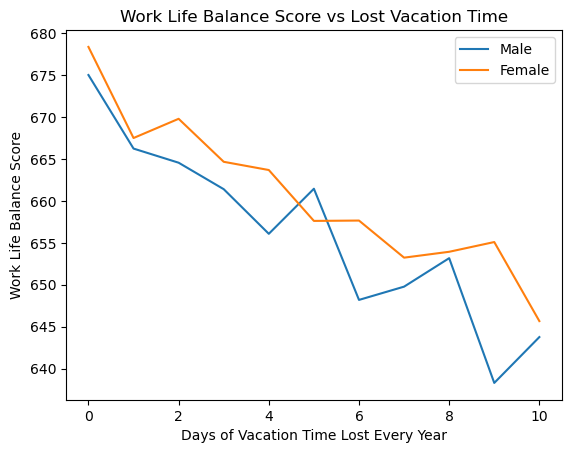

In [40]:
# Group by lost vacation time and take the average work life balance score of each group
male_vacation = male_meaning.groupby('Lost Vacation')['Work Life Balance Score'].mean()
female_vacation = female_meaning.groupby('Lost Vacation')['Work Life Balance Score'].mean()

# Plot the data
male_vacation.plot(label='Male')
female_vacation.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Days of Vacation Time Lost Every Year')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Lost Vacation Time')
plt.legend(loc='best')
plt.show()

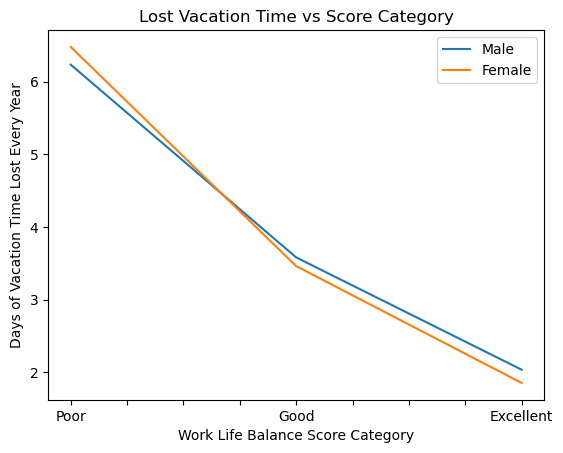

In [41]:
# Plot lost vacation vs work life score category
male_vacation_mean.plot(label='Male')
female_vacation_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Days of Vacation Time Lost Every Year')
plt.title('Lost Vacation Time vs Score Category')
plt.legend(loc='best')
plt.show()

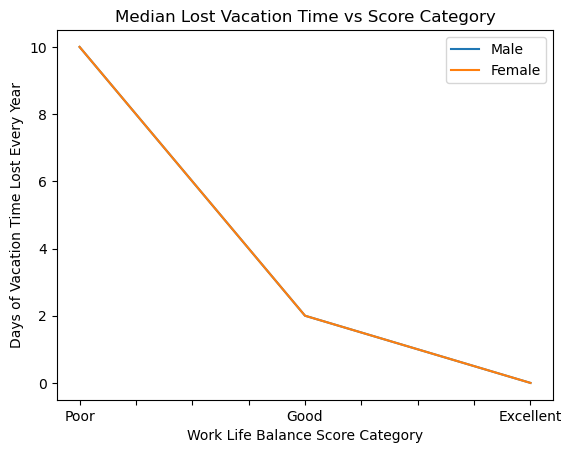

In [42]:
# Plot median (due to high skew value)
male_vacation_med.plot(label='Male')
female_vacation_med.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Days of Vacation Time Lost Every Year')
plt.title('Median Lost Vacation Time vs Score Category')
plt.legend(loc='best')
plt.show()

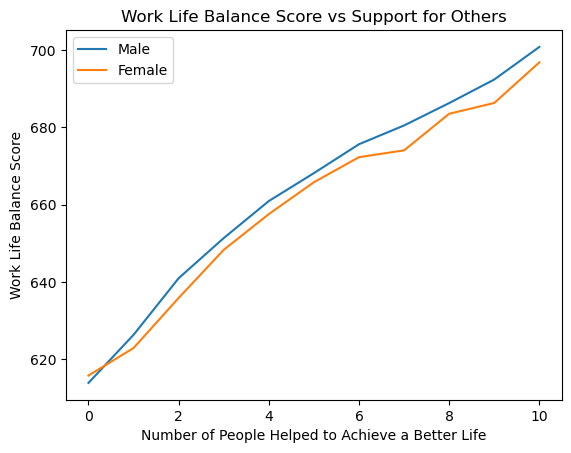

In [7]:
# Group by supporting others and take the average work life balance score of each group
male_support = male_meaning.groupby('Supporting Others')['Work Life Balance Score'].mean()
female_support = female_meaning.groupby('Supporting Others')['Work Life Balance Score'].mean()

# Plot the data
male_support.plot(label='Male')
female_support.plot(label='Female')

# Create x a y labels and title
plt.xlabel('Number of People Helped to Achieve a Better Life')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Support for Others')
plt.legend(loc='best')
plt.show()

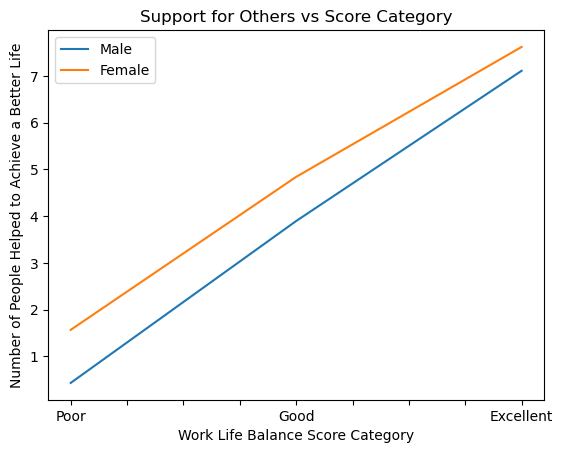

In [33]:
# Plot support for others vs work life score category
male_supporting_mean.plot(label='Male')
female_supporting_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Number of People Helped to Achieve a Better Life')
plt.title('Support for Others vs Score Category')
plt.legend(loc='best')
plt.show()

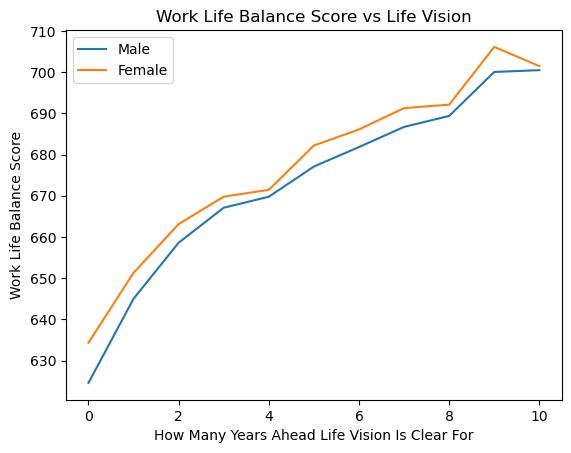

In [8]:
# Group by life vision and take the average work life balance score of each group
male_vision = male_meaning.groupby('Life Vision')['Work Life Balance Score'].mean()
female_vision = female_meaning.groupby('Life Vision')['Work Life Balance Score'].mean()

# Plot the data
male_vision.plot(label='Male')
female_vision.plot(label='Female')

# Create x a y labels and title
plt.xlabel('How Many Years Ahead Life Vision Is Clear For')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Life Vision')
plt.legend(loc='best')
plt.show()

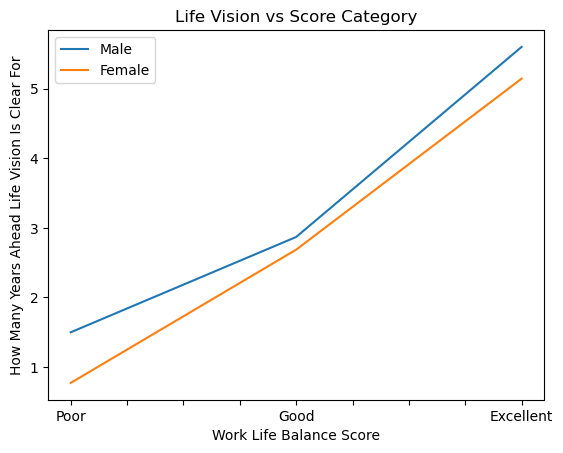

In [34]:
# Plot life vision vs work life score category
male_vision_mean.plot(label='Male')
female_vision_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score')
plt.ylabel('How Many Years Ahead Life Vision Is Clear For')
plt.title('Life Vision vs Score Category')
plt.legend(loc='best')
plt.show()

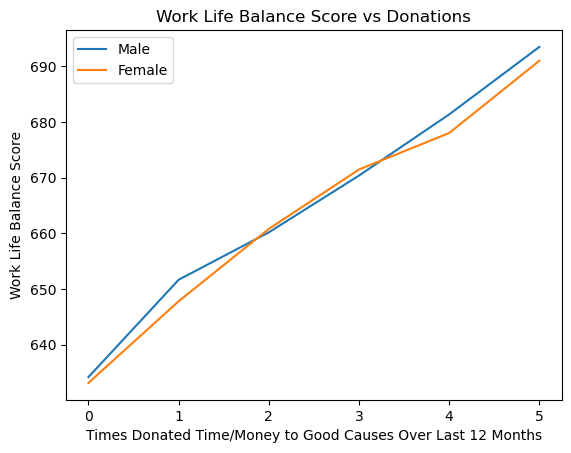

In [35]:
# Group by donation and take the average work life balance score of each group
male_donation = male_meaning.groupby('Donation')['Work Life Balance Score'].mean()
female_donation = female_meaning.groupby('Donation')['Work Life Balance Score'].mean()

# Plot the data
male_donation.plot(label='Male')
female_donation.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Times Donated Time/Money to Good Causes Over Last 12 Months')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Donations')
plt.legend(loc='best')
plt.show()

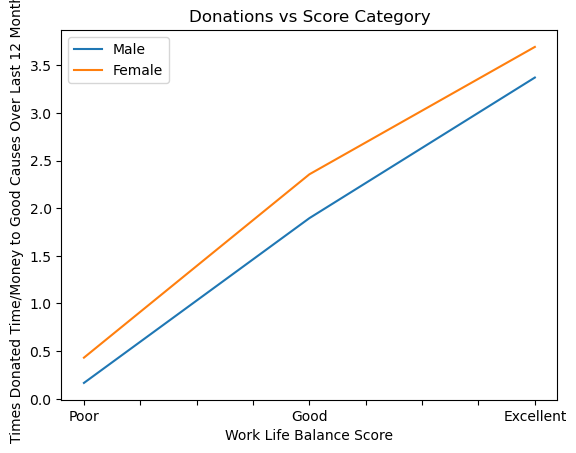

In [36]:
# Plot donation vs work life score category
male_donation_mean.plot(label='Male')
female_donation_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score')
plt.ylabel('Times Donated Time/Money to Good Causes Over Last 12 Months')
plt.title('Donations vs Score Category')
plt.legend(loc='best')
plt.show()

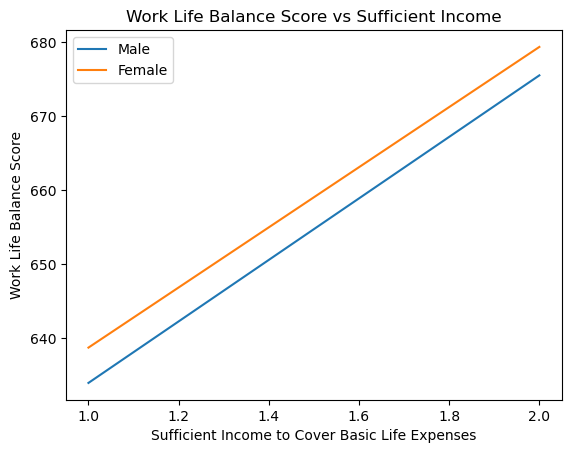

In [10]:
# Group by sufficient income and take the average work life balance score of each group
male_income = male_meaning.groupby('Sufficient Income')['Work Life Balance Score'].mean()
female_income = female_meaning.groupby('Sufficient Income')['Work Life Balance Score'].mean()

# Plot the data
male_income.plot(label='Male')
female_income.plot(label='Female')

# Create x a y labels and title
plt.xlabel('Sufficient Income to Cover Basic Life Expenses')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Sufficient Income')
plt.legend(loc='best')
plt.show()

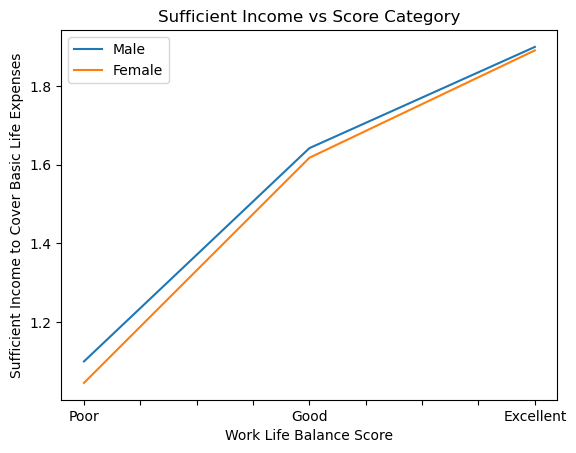

In [37]:
# Plot sufficient income vs work life score category
male_income_mean.plot(label='Male')
female_income_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score')
plt.ylabel('Sufficient Income to Cover Basic Life Expenses')
plt.title('Sufficient Income vs Score Category')
plt.legend(loc='best')
plt.show()

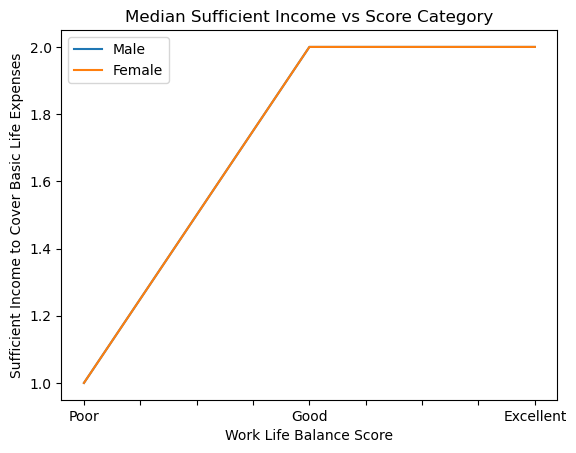

In [44]:
# Plot median (due to high skew value)
male_income_med.plot(label='Male')
female_income_med.plot(label='Female')

plt.xlabel('Work Life Balance Score')
plt.ylabel('Sufficient Income to Cover Basic Life Expenses')
plt.title('Median Sufficient Income vs Score Category')
plt.legend(loc='best')
plt.show()